#### Importing all necessary libary 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

#### Importing CSV file

In [2]:
df=pd.read_csv("loanpredicition.csv")

#### Seeing first five Rows in CSV file 

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Seeing Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Null values in Respective columns

In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df["Gender"].mode()

0    Male
Name: Gender, dtype: object

#### ∵ df ["Gender"].mode() has series of elements 0 and male we keep df["Gender"].mode()[0] so that we get we get value 0 and we can fill in missing value using fillna

In [7]:
df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)

In [8]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Now all missing elements are filled with there respective mode

In [9]:
df["Married"].fillna(df["Married"].mode()[0], inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0], inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)
df["LoanAmount"].fillna(df["LoanAmount"].mode()[0], inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0], inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0], inplace=True)

In [10]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

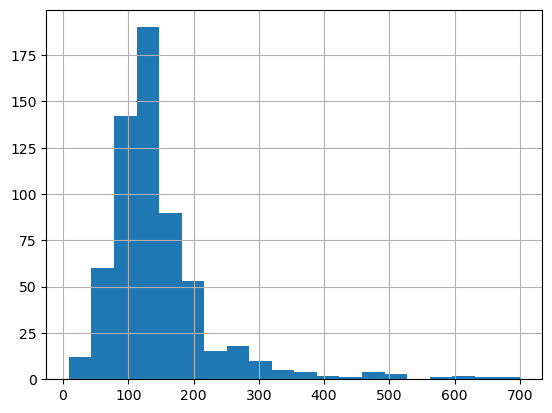

In [11]:
df["LoanAmount"].hist(bins=20)

In [12]:
df["TotalIncome"]=df["ApplicantIncome"]+df["CoapplicantIncome"]

<AxesSubplot:>

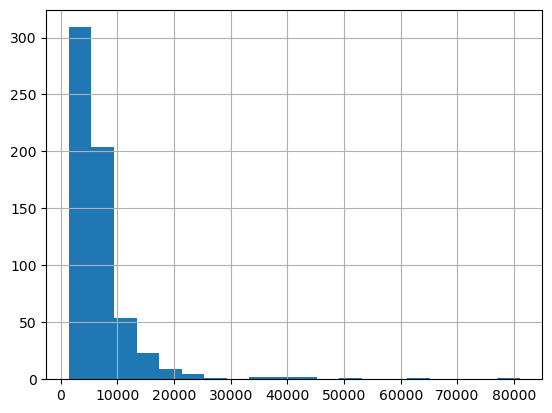

In [13]:
df["TotalIncome"].hist(bins=20)

In [14]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
dtype: int64

In [15]:
df["loanamount"]=df["LoanAmount"]

In [16]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
loanamount           0
dtype: int64

#### Shape of dataframe there are 15 columns and 614 rows

In [17]:
df.shape

(614, 15)

#### Percentage of Gender missing = Gender null/total no of rows 

In [18]:
df["Gender"].isna().sum()/df.shape[0]*100

0.0

In [19]:
print("No of people who takes loan as group as Gender ")
df["Gender"].value_counts()

No of people who takes loan as group as Gender 


Male      502
Female    112
Name: Gender, dtype: int64

#### To plot  Gender 

<AxesSubplot:xlabel='Gender', ylabel='count'>

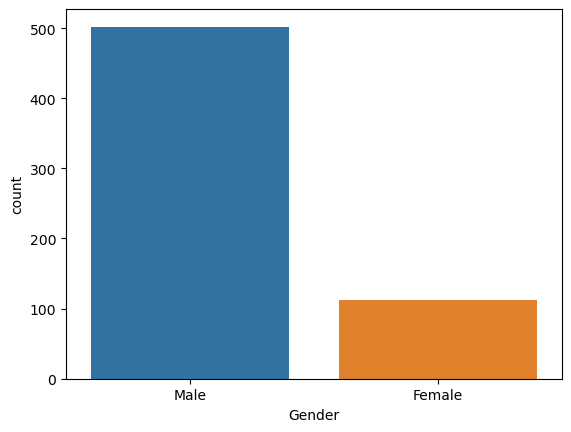

In [20]:
sns.countplot(x='Gender',data=df)

#### To plot  Married

No of people who takes loan as group as Married 
Yes    401
No     213
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

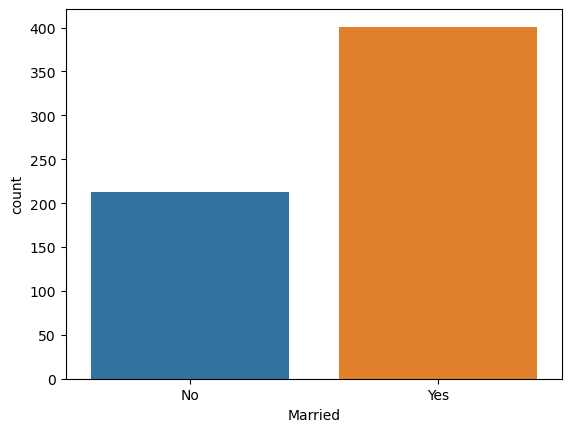

In [21]:
print("No of people who takes loan as group as Married ")
print(df["Married"].value_counts())
sns.countplot(x='Married',data=df)

#### To plot  Dependents

No of people who takes loan as group as Dependents 
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

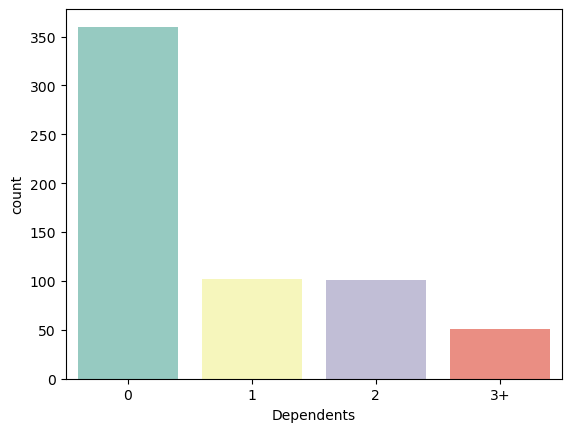

In [22]:
print("No of people who takes loan as group as Dependents ")
print(df["Dependents"].value_counts())
# we can change color using palette to set1,set2,set3
sns.countplot(x='Dependents',data=df,palette='Set3')

#### To plot  LoanAmount

No of people who takes loan as group as LoanAmount 
120.0    42
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64


<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

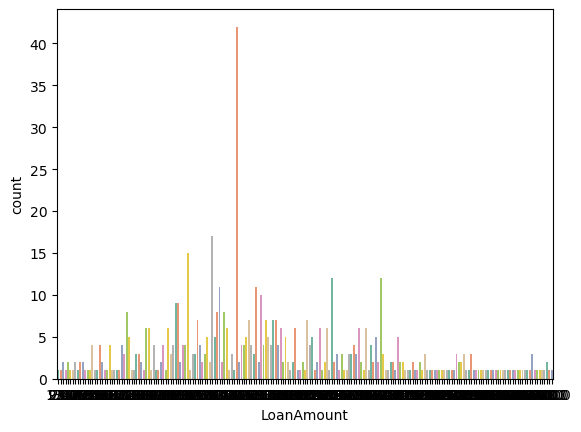

In [23]:
print("No of people who takes loan as group as LoanAmount ")
print(df["LoanAmount"].value_counts())
sns.countplot(x='LoanAmount',data=df,palette='Set2')

#### To plot  Credit_History

No of people who takes loan as group as Credit_History 
1.0    525
0.0     89
Name: Credit_History, dtype: int64


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

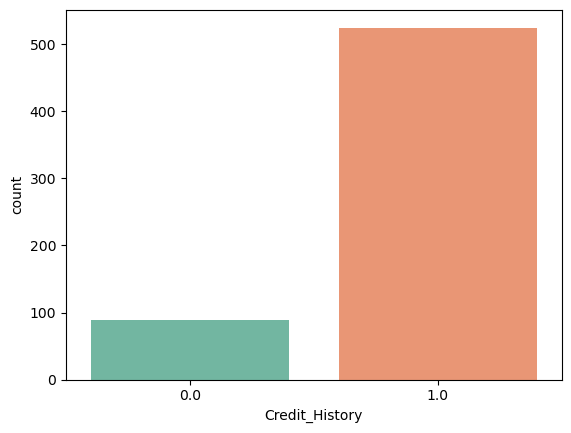

In [24]:
print("No of people who takes loan as group as Credit_History ")
print(df["Credit_History"].value_counts())
sns.countplot(x='Credit_History',data=df,palette='Set2')

In [25]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome', 'loanamount'],
      dtype='object')

In [26]:
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,loanamount
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,5849.0,120.0


##### iloc[rows,columns]

In [27]:
x = df.iloc[:, np.r_[1:5, 9:11, 13:15]].values
y = df.iloc[:, 12].values
print(x[0])
print(y[0])

['Male' 'No' '0' 'Graduate' 360.0 1.0 5849.0 120.0]
Y


#### x=[Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,TotalIncome,loanamount]
#### y=[Loan_Status]

#### Now we have to train and test the data so now we have split data into train and test so  from sklearn.model_selection import train_test_split to split data set into train and test

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

from sklearn.preprocessing import LabelEncoder
Labelencoder_x=LabelEncoder()

##### LabelEncoder()---> Initializes an empty mapping between labels and integers.
##### fit()         ---> Mapping between the unique labels and the corresponding encoded integers
##### transform     ---> The learned encoding to convert the labels into their corresponding numerical representation
##### fit_transform --->does both fit and transform

#### To see what is train and test data

In [29]:
x_train[0]

array(['Male', 'Yes', '0', 'Graduate', 360.0, 1.0, 5858.0, 131.0],
      dtype=object)

In [30]:
x_test[0]

array(['Male', 'No', '0', 'Graduate', 360.0, 1.0, 7085.0, 84.0],
      dtype=object)

In [31]:
y_train[0]

'Y'

In [32]:
y_test[0]

'Y'

In [33]:
for i in  range(0,7):
    x_train[:,i]=Labelencoder_x.fit_transform(x_train[:,i])
x_train    

array([[1, 1, 0, ..., 1, 267, 131.0],
       [1, 0, 1, ..., 1, 407, 196.0],
       [1, 1, 0, ..., 0, 249, 149.0],
       ...,
       [1, 1, 3, ..., 1, 363, 200.0],
       [1, 1, 0, ..., 1, 273, 160.0],
       [0, 1, 0, ..., 1, 301, 182.0]], dtype=object)

In [34]:
Labelencoder_y=LabelEncoder()
y_train=Labelencoder_y.fit_transform(y_train)
y_train 

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [35]:
for i in  range(0,7):
    x_test[:,i]=Labelencoder_x.fit_transform(x_test[:,i])
x_test   

array([[1, 0, 0, 0, 5, 1, 85, 84.0],
       [0, 0, 0, 0, 5, 1, 28, 112.0],
       [1, 1, 0, 0, 5, 1, 104, 324.0],
       [1, 1, 0, 0, 5, 1, 80, 110.0],
       [1, 1, 2, 0, 5, 1, 22, 97.0],
       [1, 1, 0, 1, 3, 0, 70, 165.0],
       [1, 1, 3, 0, 3, 1, 77, 157.0],
       [1, 0, 0, 0, 5, 1, 114, 405.0],
       [1, 0, 0, 0, 5, 0, 53, 124.0],
       [1, 1, 0, 0, 5, 1, 55, 128.0],
       [0, 0, 0, 0, 5, 1, 4, 84.0],
       [1, 1, 1, 0, 5, 1, 2, 95.0],
       [0, 0, 0, 0, 5, 1, 96, 280.0],
       [1, 1, 2, 0, 5, 1, 97, 236.0],
       [1, 1, 0, 0, 5, 1, 117, 96.0],
       [1, 1, 1, 0, 5, 1, 22, 67.0],
       [1, 0, 1, 1, 5, 1, 32, 190.0],
       [1, 0, 0, 1, 5, 1, 25, 132.0],
       [0, 0, 0, 0, 5, 1, 1, 93.0],
       [1, 1, 0, 1, 5, 0, 44, 181.0],
       [0, 1, 0, 0, 5, 0, 71, 120.0],
       [1, 1, 0, 0, 5, 1, 43, 143.0],
       [1, 1, 2, 0, 5, 1, 91, 108.0],
       [1, 1, 2, 0, 5, 1, 111, 165.0],
       [1, 1, 0, 0, 5, 1, 35, 58.0],
       [1, 1, 1, 0, 5, 1, 94, 250.0],
       [1, 0, 0, 0,

In [36]:
Labelencoder_y=LabelEncoder()
y_test=Labelencoder_y.fit_transform(y_test)
y_test 

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

#### StandardScaler: This transformer is used for feature scaling by subtracting the mean and dividing by the standard deviation. 
#### LabelEncoder: This transformer is used to encode categorical labels into numerical values.

In [37]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

#### Here Dataset is a labeled Data so it is supvised learning So we can use Regression or Classification 
#### ∵ Here label is not a value so we will not use regression 
#### Hence we will use classification 
#### To solve Classification we use classifiers like Decision Tree,Random Forest ,Naive Bayes 

In [38]:
from sklearn.ensemble import RandomForestClassifier
Forest=RandomForestClassifier()
Forest.fit(x_train,y_train)


RandomForestClassifier()

In [39]:
from sklearn import metrics
y_pred=Forest.predict(x_test)
accforest=str(metrics.accuracy_score(y_pred,y_test))
print("Random Forest accuracy:" + accforest)
y_pred

Random Forest accuracy:0.7886178861788617


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [40]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()
naive.fit(x_train,y_train)

GaussianNB()

In [41]:
y_pred=naive.predict(x_test)
accnaive=str(metrics.accuracy_score(y_pred,y_test))
print("naive bayes accuracy:" + accnaive)
y_pred

naive bayes accuracy:0.8292682926829268


array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [42]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
y_pred=tree.predict(x_test)
acctree=str(metrics.accuracy_score(y_pred,y_test))
print("Decision Tree accuracy:" + acctree)
y_pred

Decision Tree accuracy:0.7398373983739838


array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1])